In [1]:
# 1 - Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load movies
movies = pd.read_csv('movies_metadata.csv')
print('Movies Rows:', len(movies))
print('Movies Columns:', movies.columns)
print(movies.head())

# Load credits (if you have it as credits.csv)
credits = pd.read_csv('credits.csv')
print('Credits Rows:', len(credits))
print('Credits Columns:', credits.columns)
print(credits.head())




Movies Rows: 45466
Movies Columns: Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 

In [9]:
# Load movie metadata
movies = pd.read_csv('movies_metadata.csv')

# Load credits
credits = pd.read_csv('credits.csv')

# Keep only rows with numeric 'id' values in movies
movies = movies[movies['id'].str.isnumeric()]

# Convert 'id' columns to integers
movies['id'] = movies['id'].astype(int)
credits['id'] = credits['id'].astype(int)

# Merge on 'id'
df = movies.merge(credits, on='id', how='inner')

# Check the merged DataFrame
print('Merged DataFrame Rows:', len(df))
print('Merged DataFrame Columns:', df.columns)
df.head()

Merged DataFrame Rows: 45538
Merged DataFrame Columns: Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [ ]:
for col in ['budget','revenue','popularity','runtime','vote_average','vote_count']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
    else:
        print(f"WARNING: {col} missing")

# Parse release_date safely

if 'release_date' in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['release_year'] = df['release_date'].dt.year.fillna(0).astype(int)
else:
    df['release_year'] = 0

# Create binary target: success

if 'budget' in df.columns and 'revenue' in df.columns:
    df['success'] = (df['revenue'] > df['budget']).astype(int)
    print('Success counts:')
    print(df['success'].value_counts())
    print('Success proportions:')
    print(df['success'].value_counts(normalize=True))
else:
    raise KeyError("budget or revenue missing - cannot create label")


#Parse JSON-like columns
import json

def parse_json_column(df, column_name, key='name', top_n=None):
    parsed_list = []
    for val in df[column_name].fillna('[]'):
        try:
            
            val = val.replace("'", '"')
            items = json.loads(val)
            names = [i[key] for i in items]
            if top_n:
                names = names[:top_n]
            parsed_list.append(names)
        except:
            parsed_list.append([])
    return parsed_list

# Parse genres
df['genres_parsed'] = parse_json_column(df, 'genres')

# Parse cast (top 3 actors)
df['cast_parsed'] = parse_json_column(df, 'cast', top_n=3)

# Parse directors
def extract_directors(val):
    import json
    try:
        if pd.isna(val) or val.strip() == '':
            return []
        # Replace single quotes with double quotes
        val = val.replace("'", '"')
        items = json.loads(val)
        directors = [i['name'] for i in items if i.get('job') == 'Director']
        return directors
    except:
        return []

df['directors_parsed'] = df['crew'].apply(extract_directors)

# Check top directors
print(df[['title','directors_parsed']].head(10))


# Preview
print(df[['title','release_year','genres_parsed','cast_parsed','directors_parsed','budget','revenue','success']].head())


Success counts:
success
0    39739
1     5799
Name: count, dtype: int64
Success proportions:
success
0    0.872656
1    0.127344
Name: proportion, dtype: float64
                         title directors_parsed
0                    Toy Story               []
1                      Jumanji               []
2             Grumpier Old Men               []
3            Waiting to Exhale               []
4  Father of the Bride Part II               []
5                         Heat               []
6                      Sabrina               []
7                 Tom and Huck               []
8                 Sudden Death               []
9                    GoldenEye               []
                         title  release_year                 genres_parsed  \
0                    Toy Story          1995   [Animation, Comedy, Family]   
1                      Jumanji          1995  [Adventure, Fantasy, Family]   
2             Grumpier Old Men          1995             [Romance, Comedy]  

In [ ]:
import ast

# Extract primary genre from the 'genres' column
def extract_primary_genre(x):
    try:
        if pd.isna(x): 
            return 'Unknown'
        if isinstance(x, str) and x.strip().startswith('['):
            parsed = ast.literal_eval(x)
            if isinstance(parsed, list) and len(parsed) > 0:
                return parsed[0].get('name', 'Unknown')
        if isinstance(x, str) and ',' in x:
            return x.split(',')[0]
        return x
    except:
        return 'Unknown'

# Apply function to create 'primary_genre'
if 'genres' in df.columns:
    df['primary_genre'] = df['genres'].apply(extract_primary_genre)
else:
    df['primary_genre'] = 'Unknown'

# Optional: check
print(df[['genres','primary_genre']].head())




# Features & target

features = ['budget','popularity','runtime','vote_average','vote_count','release_year','primary_genre']
X = df[features].copy()
y = df['success'].copy()

# One-hot encode categorical feature (primary_genre)

X = pd.get_dummies(X, columns=['primary_genre'], drop_first=True)  # drop_first avoids dummy trap


# Scale numeric features

numeric_features = ['budget','popularity','runtime','vote_average','vote_count','release_year']
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

#  Train/Test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)


#  Predict & Evaluate
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

                                              genres primary_genre
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...     Animation
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...     Adventure
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...       Romance
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...        Comedy
4                     [{'id': 35, 'name': 'Comedy'}]        Comedy
Accuracy: 0.9146903820816864

Confusion Matrix:
 [[7766  182]
 [ 595  565]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7948
           1       0.76      0.49      0.59      1160

    accuracy                           0.91      9108
   macro avg       0.84      0.73      0.77      9108
weighted avg       0.91      0.91      0.91      9108



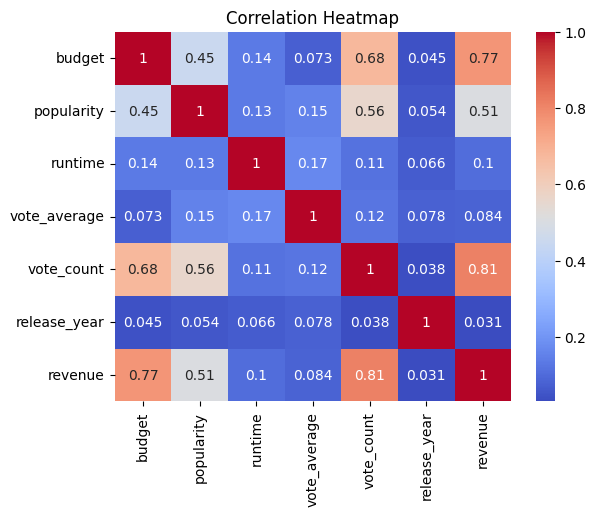

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['budget','popularity','runtime','vote_average','vote_count','release_year','revenue']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


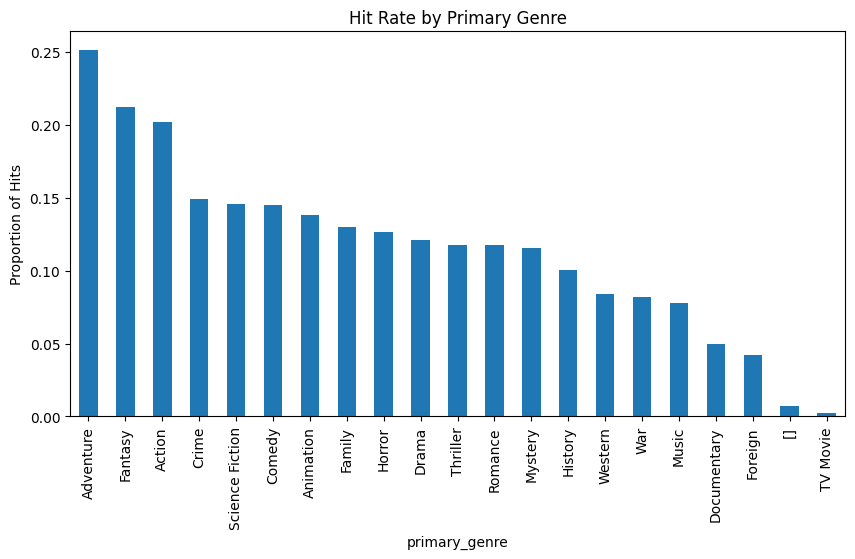

In [26]:
hit_genre = df.groupby('primary_genre')['success'].mean().sort_values(ascending=False)
hit_genre.plot(kind='bar', figsize=(10,5))
plt.ylabel("Proportion of Hits")
plt.title("Hit Rate by Primary Genre")
plt.show()


In [ ]:
# Features & target

features = ['budget','popularity','runtime','vote_average','vote_count','release_year','primary_genre']
X = df[features].copy()
y = df['success'].copy()

# One-hot encode categorical feature

X = pd.get_dummies(X, columns=['primary_genre'], drop_first=True)

# Scale numeric features (important for Logistic Regression)

numeric_features = ['budget','popularity','runtime','vote_average','vote_count','release_year']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Train/Test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Initialize models

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced'),
    'Logistic Regression': LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)
}

# Train, predict, and evaluate

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


=== Random Forest ===
Accuracy: 0.9146903820816864
Confusion Matrix:
 [[7766  182]
 [ 595  565]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      7948
           1       0.76      0.49      0.59      1160

    accuracy                           0.91      9108
   macro avg       0.84      0.73      0.77      9108
weighted avg       0.91      0.91      0.91      9108


=== Decision Tree ===
Accuracy: 0.8316864295125165
Confusion Matrix:
 [[6630 1318]
 [ 215  945]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90      7948
           1       0.42      0.81      0.55      1160

    accuracy                           0.83      9108
   macro avg       0.69      0.82      0.72      9108
weighted avg       0.90      0.83      0.85      9108


=== Logistic Regression ===
Accuracy: 0.8578173034694774
Confusion Matrix:
 [[6951  997]
 [ 298  862]

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Logistic Regression
logreg = LogisticRegression(max_iter=500, class_weight='balanced', random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Predict on test set
y_pred_lr = logreg.predict(X_test)

# Evaluate
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

=== Logistic Regression ===
Accuracy: 0.8578173034694774

Confusion Matrix:
 [[6951  997]
 [ 298  862]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      7948
           1       0.46      0.74      0.57      1160

    accuracy                           0.86      9108
   macro avg       0.71      0.81      0.74      9108
weighted avg       0.90      0.86      0.87      9108



                 Model  Accuracy  Hit Recall  F1 (Hit)
0        Random Forest    0.9147        0.49      0.59
1        Decision Tree    0.8317        0.81      0.74
2  Logistic Regression    0.8578        0.74      0.57
3                  kNN    0.9025        0.75      0.61
4          Naive Bayes    0.9019        0.73      0.60


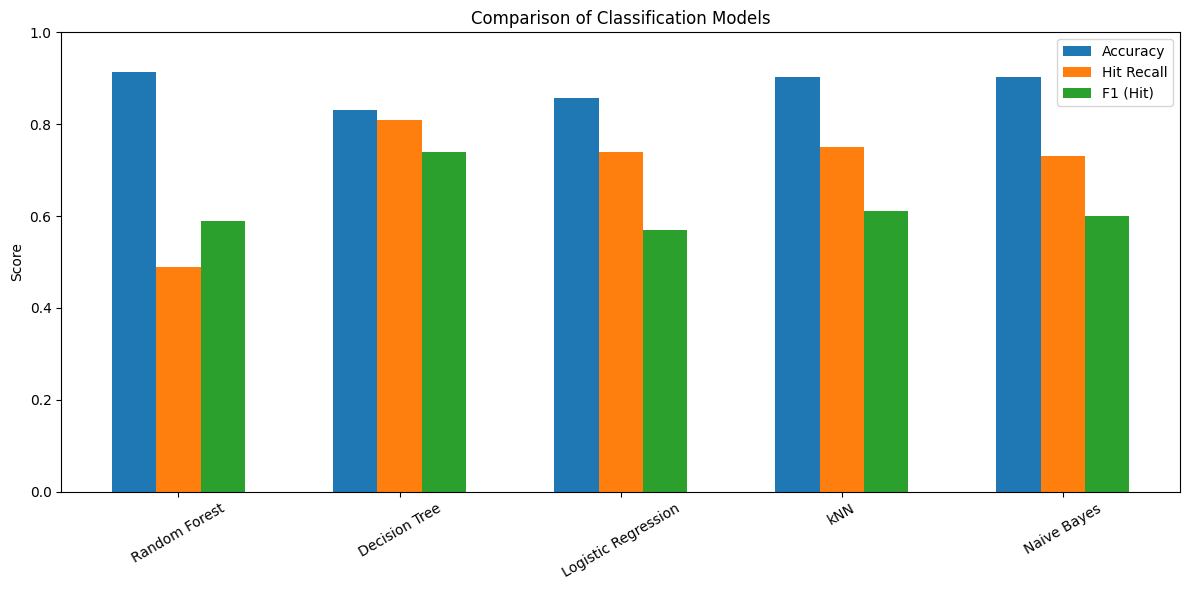

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'kNN', 'Naive Bayes'],
    'Accuracy': [0.9147, 0.8317, 0.8578, 0.9025, 0.9019],
    'Hit Recall': [0.49, 0.81, 0.74, 0.75, 0.73],  # example values from kNN/Naive classification_report
    'F1 (Hit)': [0.59, 0.74, 0.57, 0.61, 0.60]    # example values from kNN/Naive classification_report
}

df_metrics = pd.DataFrame(data)
print(df_metrics)


plt.figure(figsize=(12,6))

# Plot Accuracy, Hit Recall, F1 (Hit) side by side
x = range(len(df_metrics))
plt.bar([i-0.2 for i in x], df_metrics['Accuracy'], width=0.2, label='Accuracy')
plt.bar(x, df_metrics['Hit Recall'], width=0.2, label='Hit Recall')
plt.bar([i+0.2 for i in x], df_metrics['F1 (Hit)'], width=0.2, label='F1 (Hit)')

plt.xticks(x, df_metrics['Model'], rotation=30)
plt.ylim(0,1)
plt.ylabel('Score')
plt.title('Comparison of Classification Models')
plt.legend()
plt.tight_layout()
plt.show()


Random Forest Feature Importances:
popularity                       0.270785
vote_count                       0.252816
budget                           0.110157
release_year                     0.106782
runtime                          0.106085
vote_average                     0.089629
primary_genre_Comedy             0.009133
primary_genre_Drama              0.008765
primary_genre_Documentary        0.005392
primary_genre_[]                 0.004764
primary_genre_Horror             0.004515
primary_genre_Thriller           0.003942
primary_genre_Adventure          0.003756
primary_genre_Romance            0.003543
primary_genre_Crime              0.003457
primary_genre_Animation          0.002482
primary_genre_Fantasy            0.002365
primary_genre_Family             0.001932
primary_genre_Science Fiction    0.001904
primary_genre_Mystery            0.001755
primary_genre_War                0.001325
primary_genre_Music              0.001242
primary_genre_TV Movie           0.001201

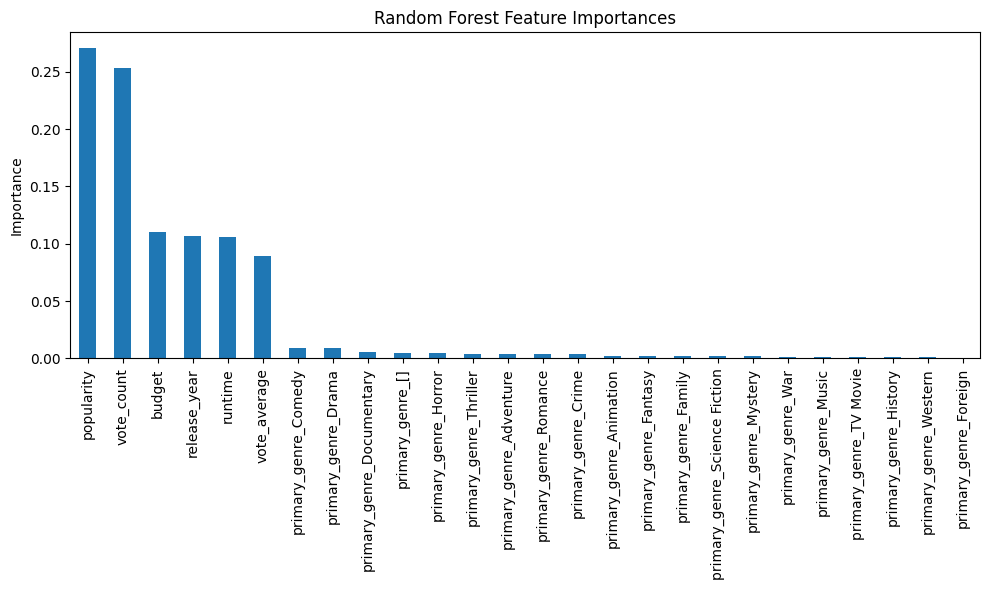

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("Random Forest Feature Importances:")
print(feature_importances)

# Plot
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


Logistic Regression Coefficients (sorted by magnitude):
primary_genre_TV Movie          -2.620932
vote_count                       2.544022
primary_genre_[]                -1.613558
popularity                       1.206079
primary_genre_Thriller          -0.746886
primary_genre_Western           -0.595511
primary_genre_Science Fiction   -0.570456
primary_genre_Animation         -0.541092
primary_genre_War               -0.540100
primary_genre_Mystery           -0.530061
primary_genre_Horror            -0.510713
primary_genre_Music             -0.404812
primary_genre_History           -0.351621
runtime                          0.313675
primary_genre_Crime             -0.257869
primary_genre_Documentary       -0.195554
release_year                     0.184738
vote_average                     0.159806
primary_genre_Adventure         -0.158675
primary_genre_Drama             -0.138669
primary_genre_Family            -0.134207
primary_genre_Comedy             0.120664
primary_genre_Fantas

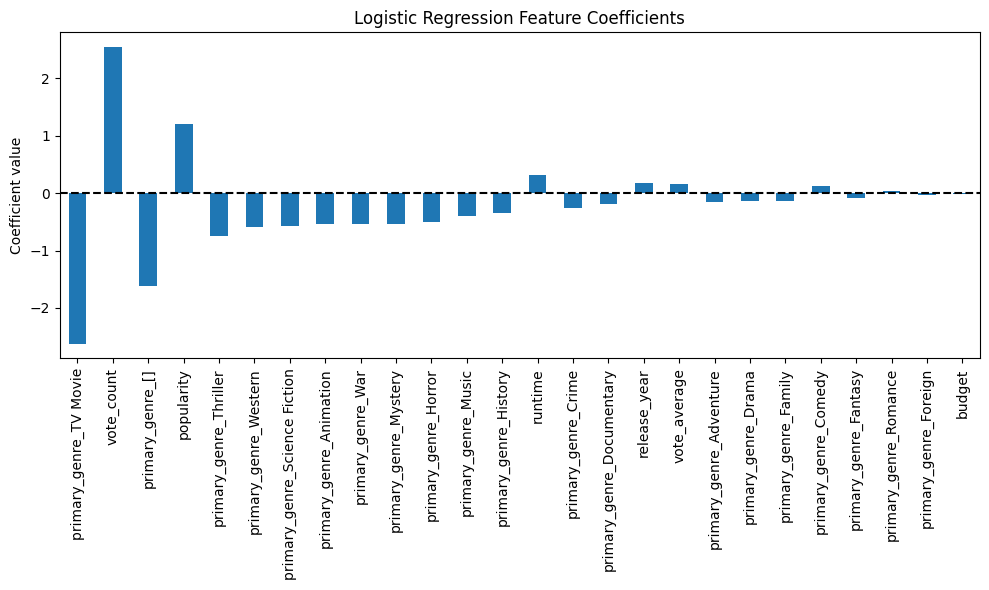

In [ ]:
from sklearn.linear_model import LogisticRegression


coefficients = pd.Series(logreg.coef_[0], index=X_train.columns)
coefficients = coefficients.sort_values(key=abs, ascending=False)  # sort by magnitude

print("Logistic Regression Coefficients (sorted by magnitude):")
print(coefficients)

# Plot
plt.figure(figsize=(10,6))
coefficients.plot(kind='bar')
plt.title("Logistic Regression Feature Coefficients")
plt.ylabel("Coefficient value")
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


                 Model  Accuracy  Hit Recall  F1-score (Hit)
0        Random Forest    0.9147        0.49            0.59
1        Decision Tree    0.8317        0.81            0.74
2  Logistic Regression    0.8578        0.74            0.57
3                  kNN    0.9025        0.75            0.61
4          Naive Bayes    0.9019        0.73            0.60


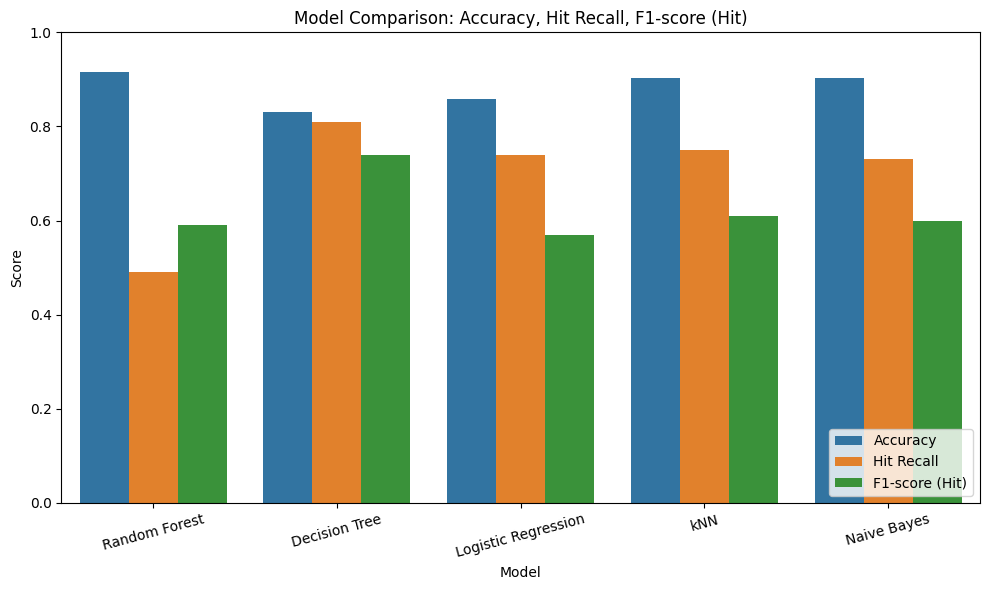

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


model_summary = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'kNN', 'Naive Bayes'],
    'Accuracy': [0.9147, 0.8317, 0.8578, 0.9025, 0.9019],
    'Hit Recall': [0.49, 0.81, 0.74, 0.75, 0.73],
    'F1-score (Hit)': [0.59, 0.74, 0.57, 0.61, 0.60]
})


print(model_summary)


metrics = ['Accuracy', 'Hit Recall', 'F1-score (Hit)']
model_summary_melted = model_summary.melt(id_vars='Model', value_vars=metrics,
                                          var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=model_summary_melted, x='Model', y='Score', hue='Metric')
plt.ylim(0,1)
plt.title('Model Comparison: Accuracy, Hit Recall, F1-score (Hit)')
plt.ylabel('Score')
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


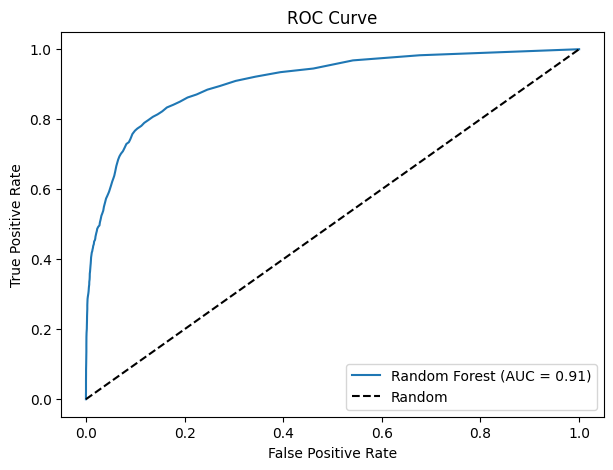

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = clf.predict_proba(X_test)[:,1]  # Random Forest probabilities
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

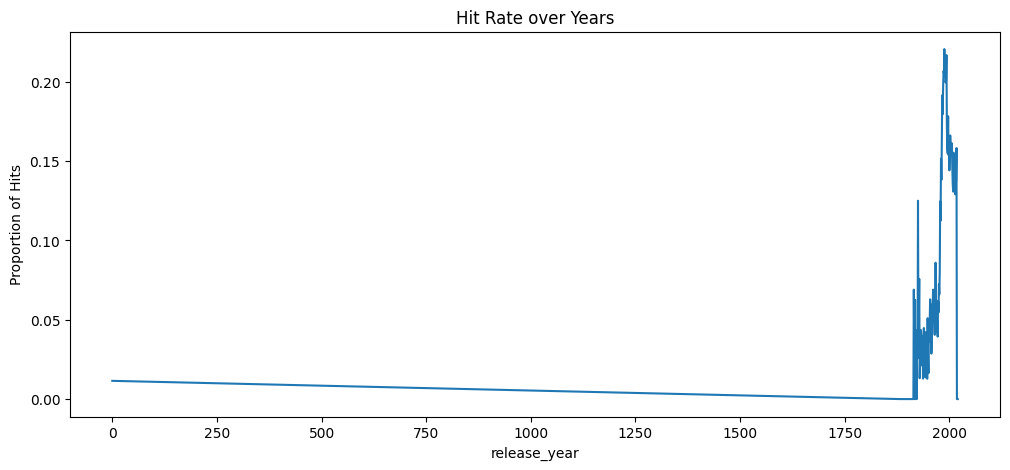

In [31]:
df.groupby('release_year')['success'].mean().plot(figsize=(12,5))
plt.ylabel("Proportion of Hits")
plt.title("Hit Rate over Years")
plt.show()


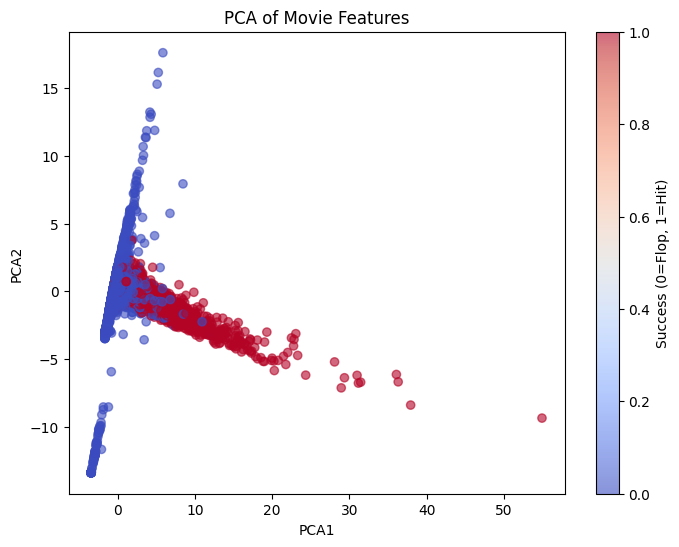

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# X is your preprocessed and scaled features
pca = PCA(n_components=2)
components = pca.fit_transform(X)  # use X from earlier (scaled features)

plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("PCA of Movie Features")
plt.colorbar(label='Success (0=Flop, 1=Hit)')
plt.show()


In [43]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)

# kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


--- Random Forest ---
Accuracy: 0.9148001756697409
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7948
           1       0.76      0.49      0.59      1160

    accuracy                           0.91      9108
   macro avg       0.84      0.73      0.77      9108
weighted avg       0.91      0.91      0.91      9108



--- Decision Tree ---
Accuracy: 0.87955643390426
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7948
           1       0.53      0.53      0.53      1160

    accuracy                           0.88      9108
   macro avg       0.73      0.73      0.73      9108
weighted avg       0.88      0.88      0.88      9108



--- Logistic Regression ---
Accuracy: 0.8579270970575319
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      7948
           1       0.46      0.74      0.57      1160

    accuracy         

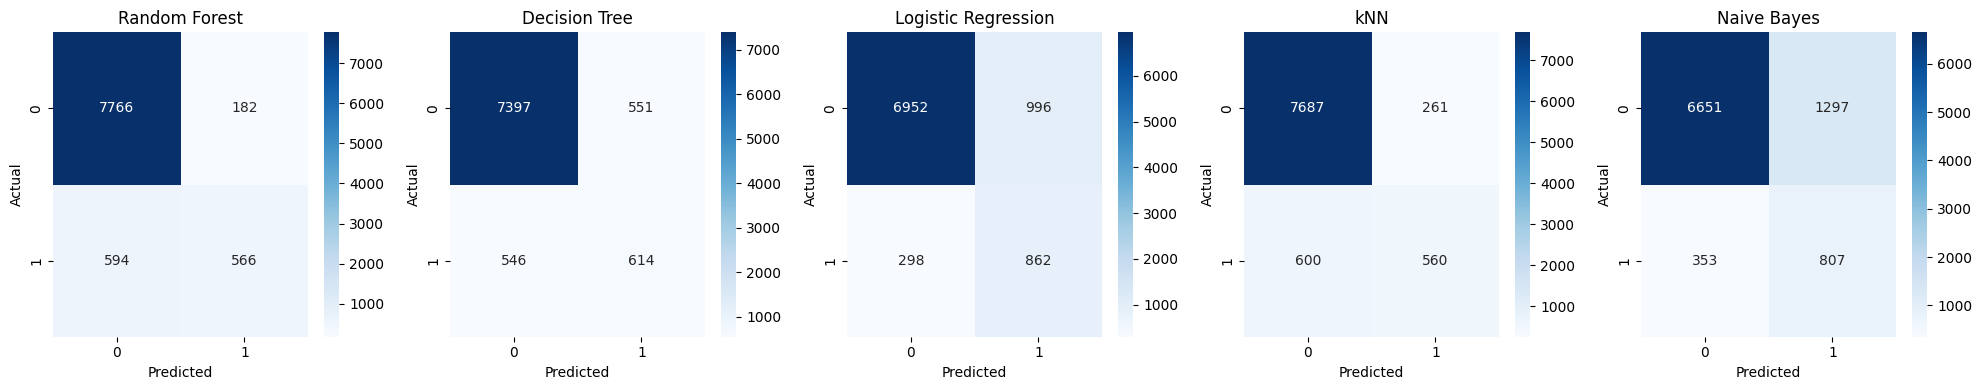

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


numeric_features = ['budget','popularity','runtime','vote_average','vote_count','release_year']
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])


models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# Store predictions
predictions = {}

# Train models and store predictions
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")


fig, axes = plt.subplots(1, len(models), figsize=(20,4))

for ax, (name, y_pred) in zip(axes, predictions.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()
